# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.

We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data consists of loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, i.e. all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style('darkgrid')
%matplotlib inline

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures")
os.makedirs(IMAGES_PATH, exist_ok=True)

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['axes.titlesize'] = 16


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
path = '../data/'
loading = pd.read_csv(path + 'velibLoading.csv', sep=" ")
loading.head()

Lun-00    Lun-01    Lun-02    Lun-03    Lun-04    Lun-05    Lun-06  \
1  0.038462  0.038462  0.076923  0.038462  0.038462  0.038462  0.038462   
2  0.478261  0.478261  0.478261  0.434783  0.434783  0.434783  0.434783   
3  0.218182  0.145455  0.127273  0.109091  0.109091  0.109091  0.090909   
4  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381  0.952381   
5  0.927536  0.811594  0.739130  0.724638  0.724638  0.724638  0.724638   

     Lun-07    Lun-08    Lun-09  ...    Dim-14    Dim-15    Dim-16    Dim-17  \
1  0.038462  0.107143  0.000000  ...  0.296296  0.111111  0.111111  0.148148   
2  0.434783  0.260870  0.043478  ...  0.043478  0.000000  0.217391  0.130435   
3  0.090909  0.054545  0.109091  ...  0.259259  0.259259  0.203704  0.129630   
4  1.000000  1.000000  1.000000  ...  1.000000  1.000000  0.904762  0.857143   
5  0.724638  0.753623  0.971014  ...  0.227273  0.454545  0.590909  0.833333   

     Dim-18    Dim-19    Dim-20    Dim-21    Dim-22    Dim-23  
1  0.307692  0.076923  0.115385  0.076923  0.153846  0.153846  
2  0.045455  0.173913  0.173913  0.173913  0.260870  0.391304  
3  0.148148  0.296296  0.314815  0.370370  0.370370  0.407407  
4  0.857143  0.857143  0.761905  0.761905  0.761905  0.761905  
5  1.000000  0.818182  0.636364  0.712121  0.621212  0.575758  

[5 rows x 168 columns]

In [3]:
velibAdds = pd.read_csv(path + 'velibAdds.csv', sep=" ")
velibAdds.head()

longitude   latitude  bonus              names
1   2.377389  48.886300      0   EURYALE DEHAYNIN
2   2.317591  48.890020      0          LEMERCIER
3   2.330447  48.850297      0    MEZIERES RENNES
4   2.271396  48.833734      0             FARMAN
5   2.366897  48.845887      0   QUAI DE LA RAPEE

In [4]:
p = loading.columns.size
Time = np.linspace(1, p, p)

Saving figure euryale_station_loading


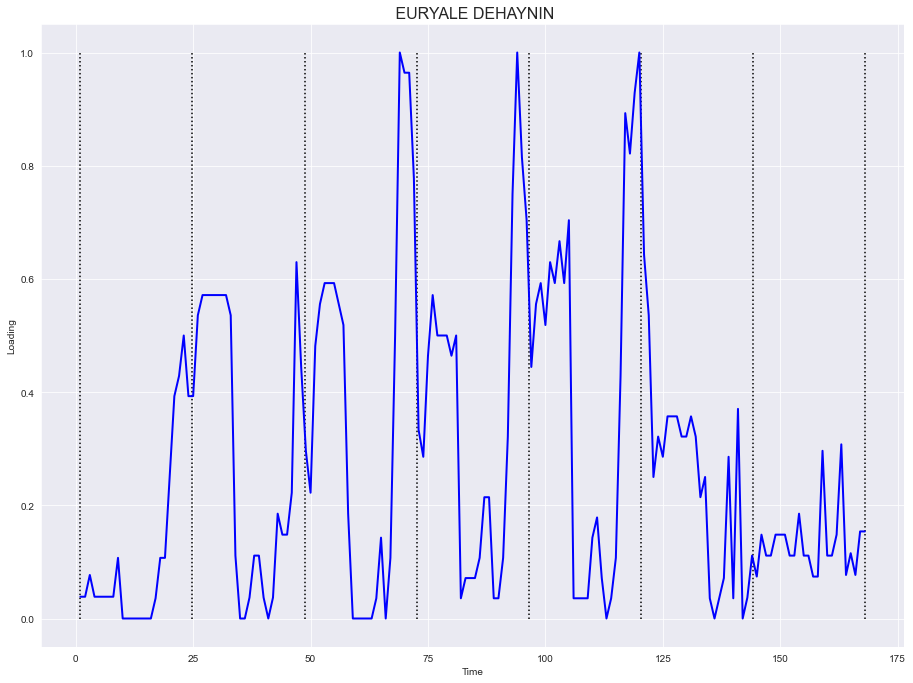

In [5]:
plt.plot(Time, loading.transpose()[1], linewidth=2, color='blue')
plt.xlabel('Time')
plt.ylabel('Loading')
plt.title(velibAdds.names[1])
plt.vlines(x=np.linspace(1, p, 8), ymin=0, ymax=1,
           colors="black", linestyle="dotted")
save_fig('euryale_station_loading')
plt.show()

## Descriptive statistics

Saving figure 16_first_loading_plots


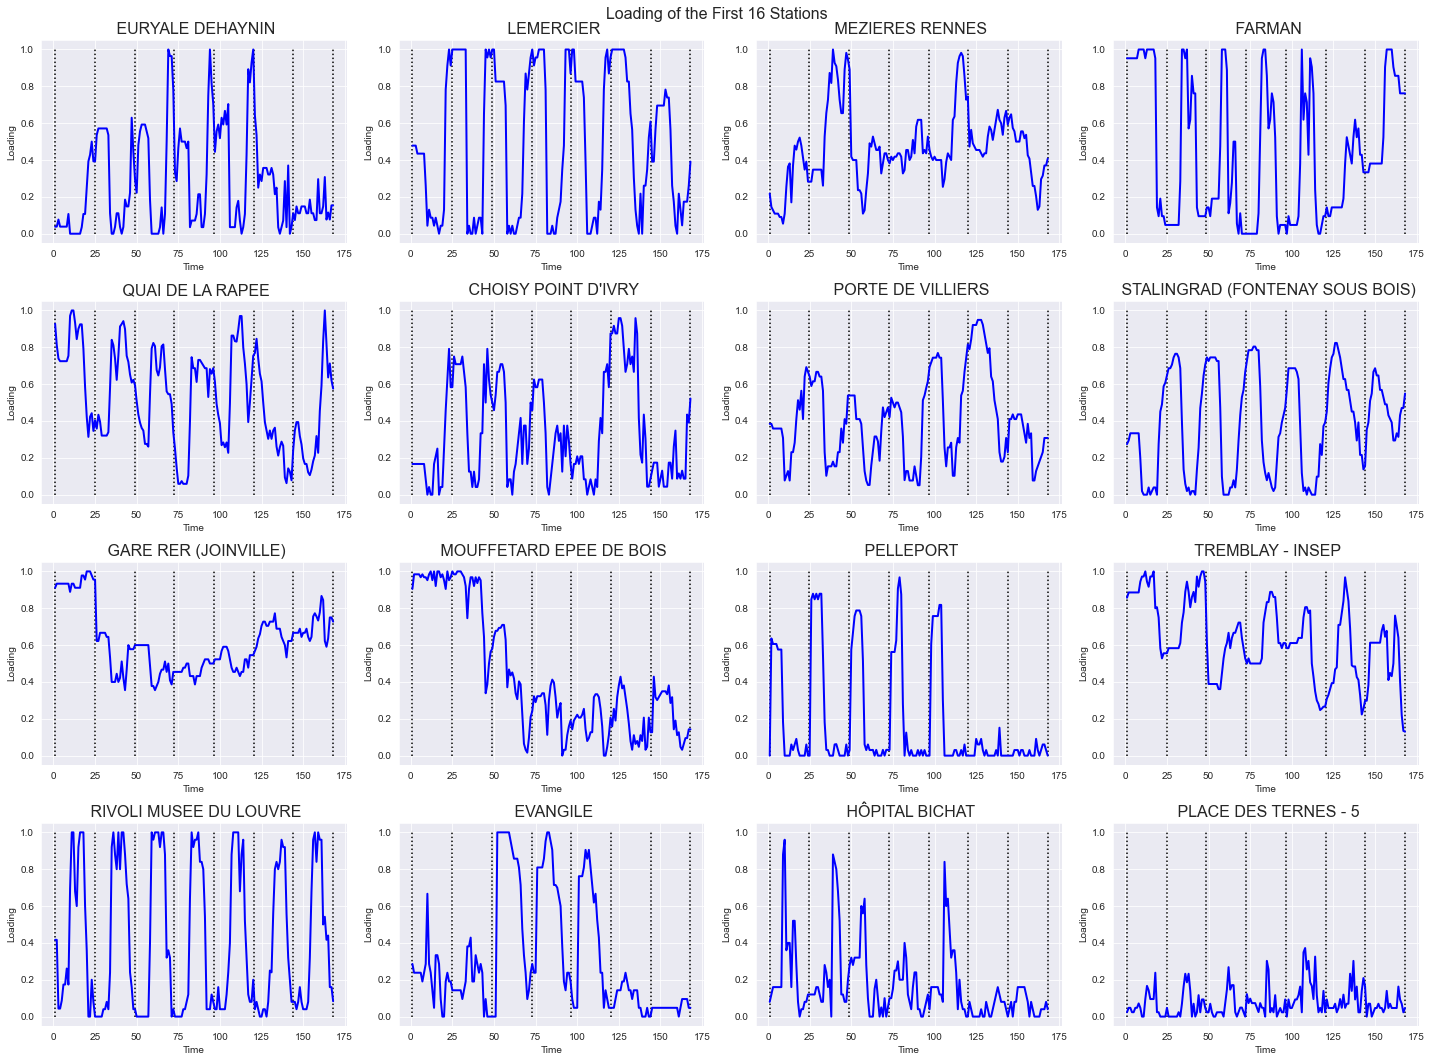

In [6]:
plt.figure(figsize=(20, 15))
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.plot(Time, loading.transpose()[i], linewidth=2, color='blue')
    plt.xlabel('Time')
    plt.ylabel('Loading')
    plt.title(velibAdds.names[i])
    plt.vlines(x=np.linspace(1, p, 8), ymin=0, ymax=1,
               colors="black", linestyle="dotted")

plt.suptitle('Loading of the First 16 Stations', fontsize=16)
save_fig('16_first_loading_plots')
plt.show()

In [7]:
def plot_boxplot(x, medianprops, title):
    plt.figure(figsize=(24, 12))
    plt.boxplot(x, medianprops=medianprops)
    plt.vlines(x=np.linspace(1, p, 8), ymin=0, ymax=1,
               colors="blue", linestyle="dotted", linewidth=3)
    plt.xticks(np.arange(0, 168, 5), labels=np.arange(0, 168, 5), fontsize=10)
    plt.title(title)

Saving figure boxplot_of_variables


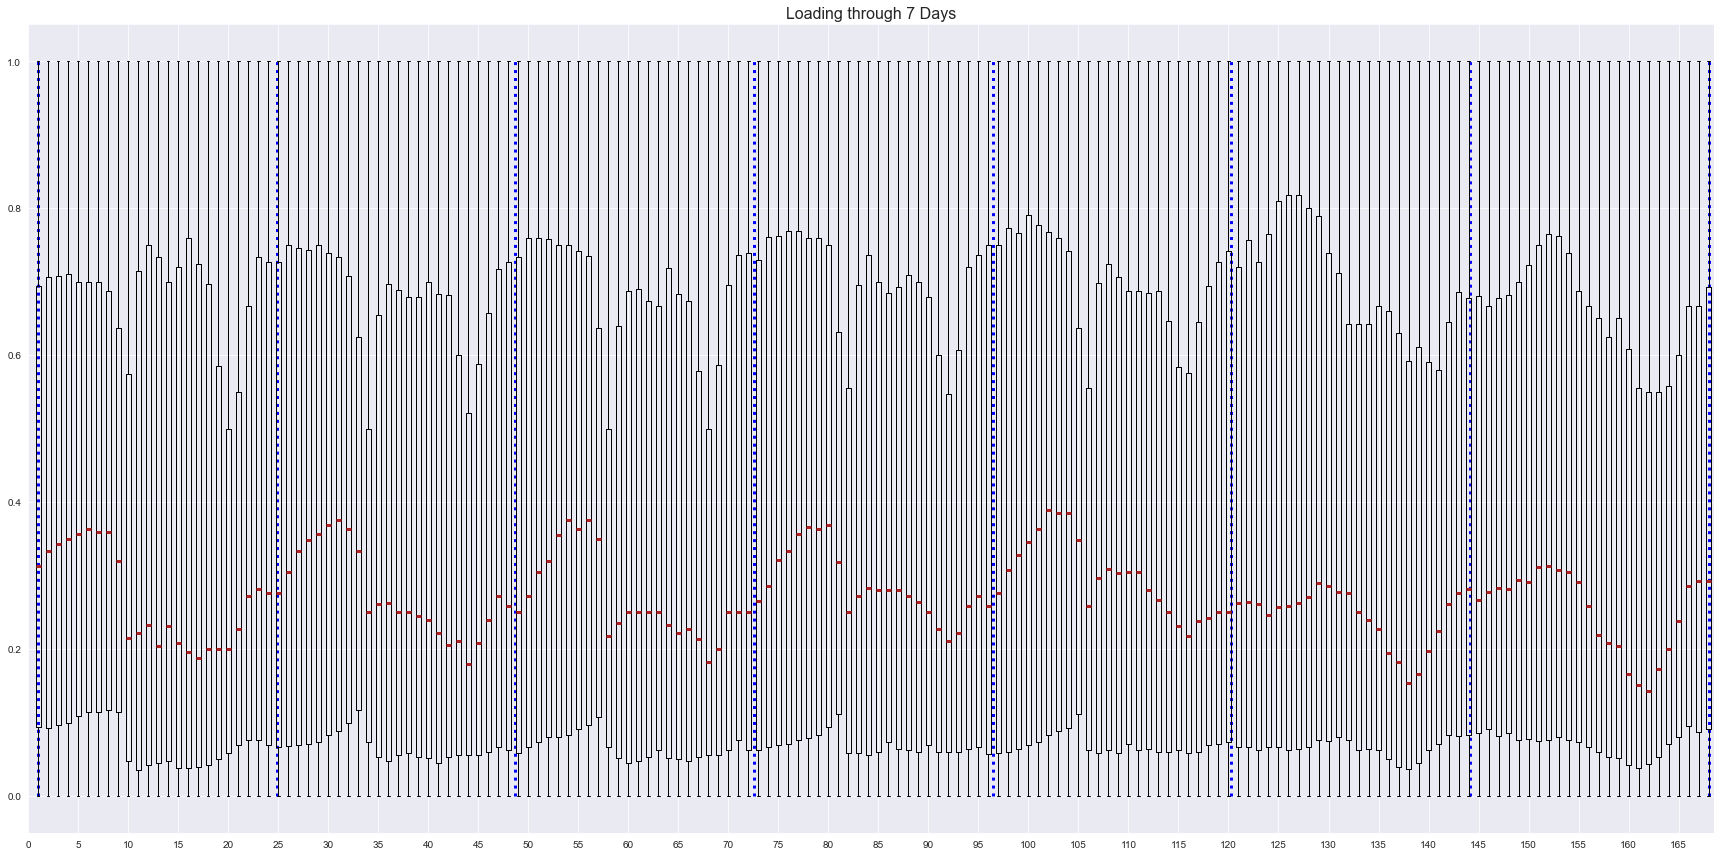

In [8]:
medianprops = dict(linestyle='-.', linewidth=3, color='firebrick')

plot_boxplot(loading, medianprops, 'Loading through 7 Days')
save_fig('boxplot_of_variables')
plt.show()

Saving figure loading_shift_correlation


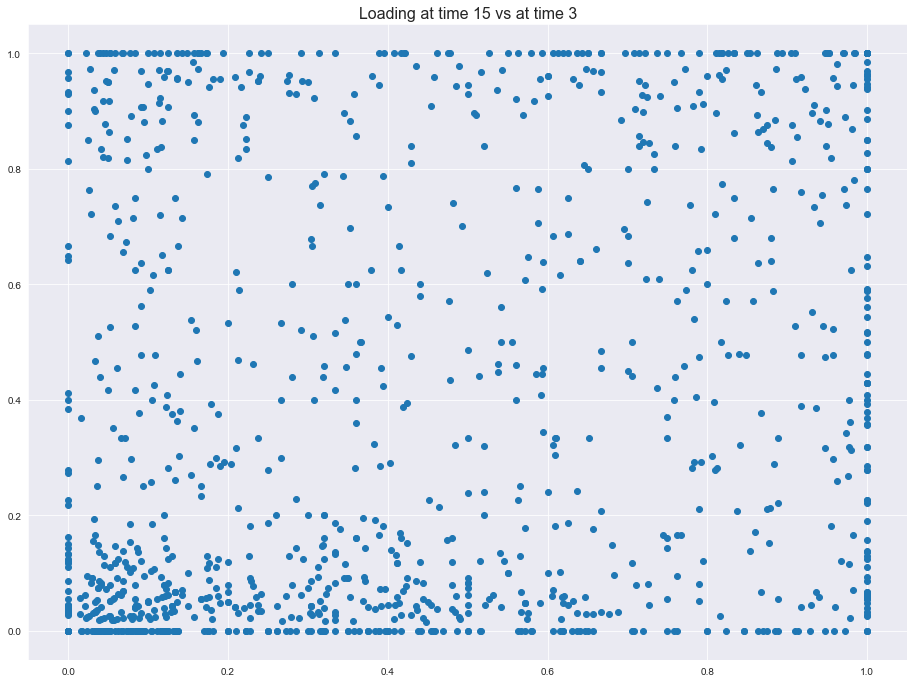

In [9]:
h = 12  # time
t = 3  # shift

plt.scatter(loading.iloc[:, t], loading.iloc[:, t+h])
plt.title("Loading at time {} vs at time {}".format(t+h, t))
save_fig('loading_shift_correlation')
plt.show()

Saving figure loading_correlation_total_day


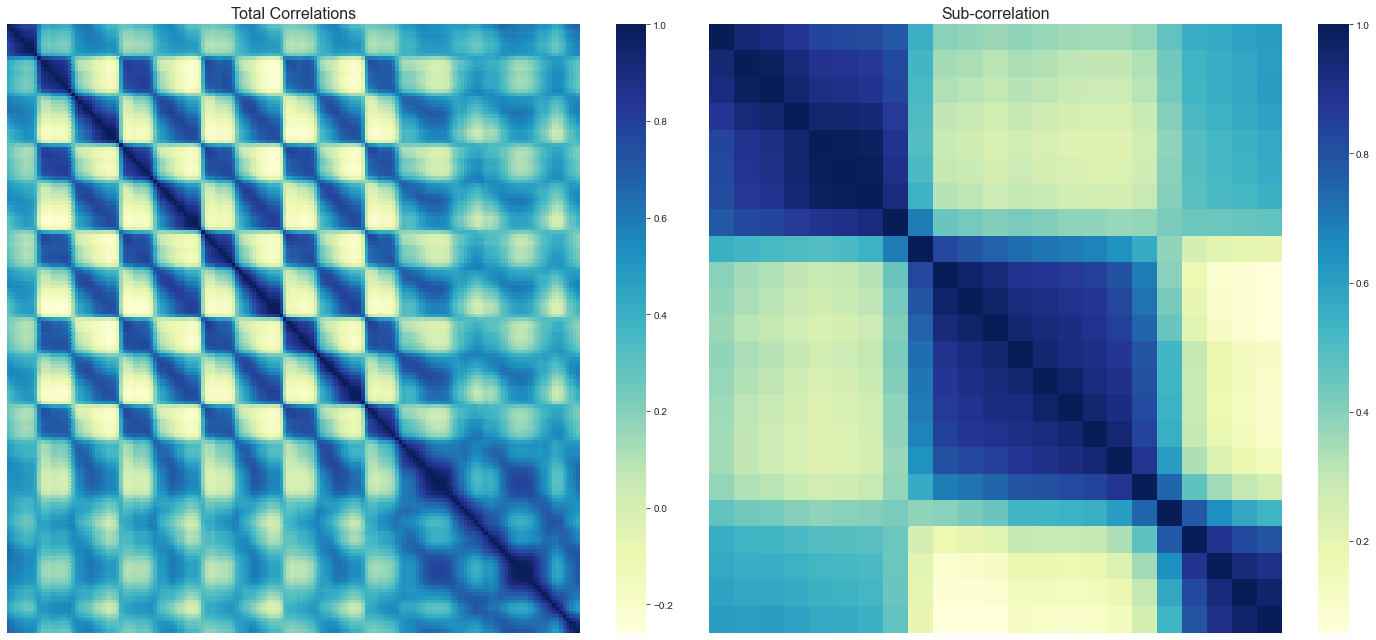

In [10]:
corr_matrix = loading.corr()

plt.figure(figsize=(20, 9))
plt.subplot(1, 2, 1)
plt.title('Total Correlations')
sns.heatmap(corr_matrix, xticklabels=False, yticklabels=False, cmap="YlGnBu")

plt.subplot(1, 2, 2)
plt.title('Sub-correlation')
sns.heatmap(corr_matrix.iloc[1:24, 1:24],
            xticklabels=False, yticklabels=False, cmap="YlGnBu")
save_fig('loading_correlation_total_day')
plt.show()

In [11]:
longitude = velibAdds.longitude
latitude = velibAdds.latitude
# on recupere les valeurs ou bonus=1 i.e. sur une colline
on_hill = (velibAdds.bonus == 1)

Saving figure location_of_stations


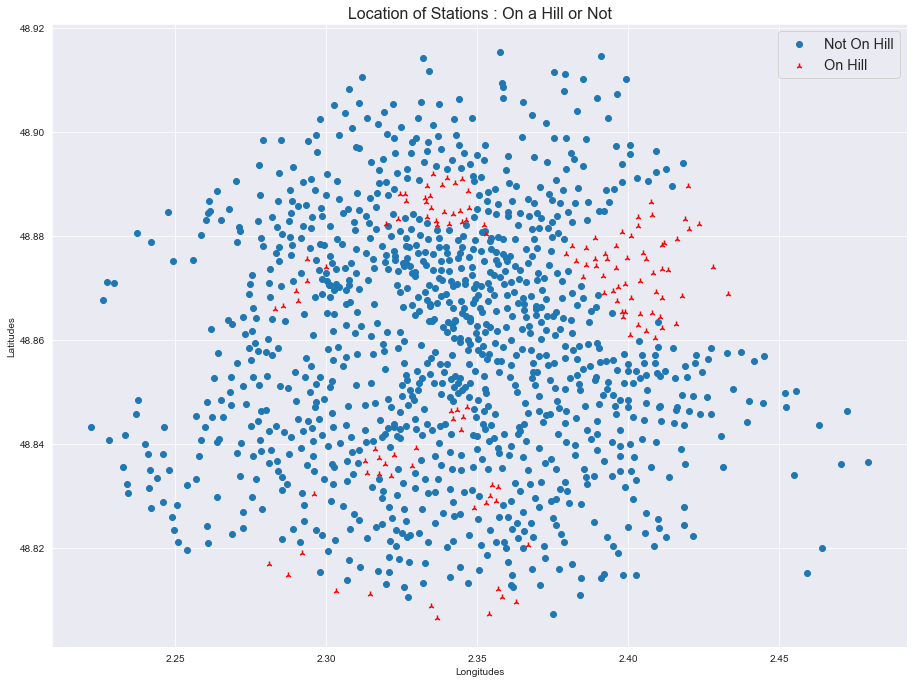

In [12]:
plt.xlim = (2.2222, 2.4795)
plt.ylim = (48.8064, 48.9152)
plt.scatter(longitude[~on_hill], latitude[~on_hill])
plt.scatter(longitude[on_hill], latitude[on_hill], c='red', marker="2")
plt.legend(labels=['Not On Hill', 'On Hill'], fontsize='x-large')
plt.xlabel('Longitudes')
plt.ylabel('Latitudes')
plt.title('Location of Stations : On a Hill or Not')
save_fig('location_of_stations')
plt.show()

Saving figure boxplot_of_hill_stations


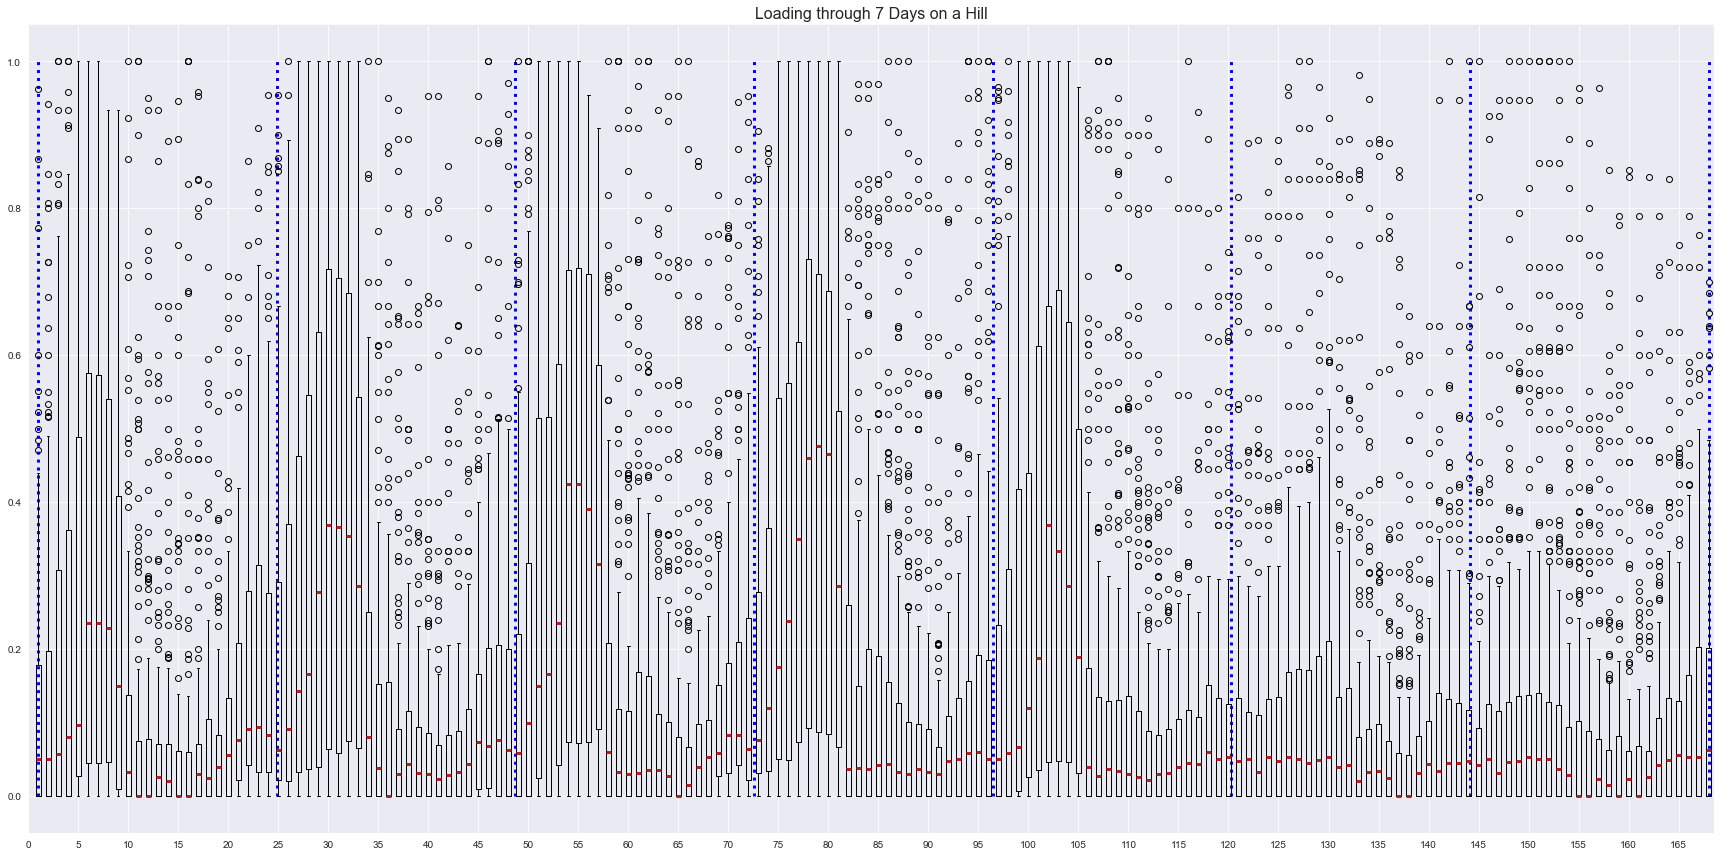

In [13]:
plot_boxplot(loading[on_hill], medianprops, 'Loading through 7 Days on a Hill')
save_fig('boxplot_of_hill_stations')
plt.show()

Saving figure boxplot_of_not_hill_stations


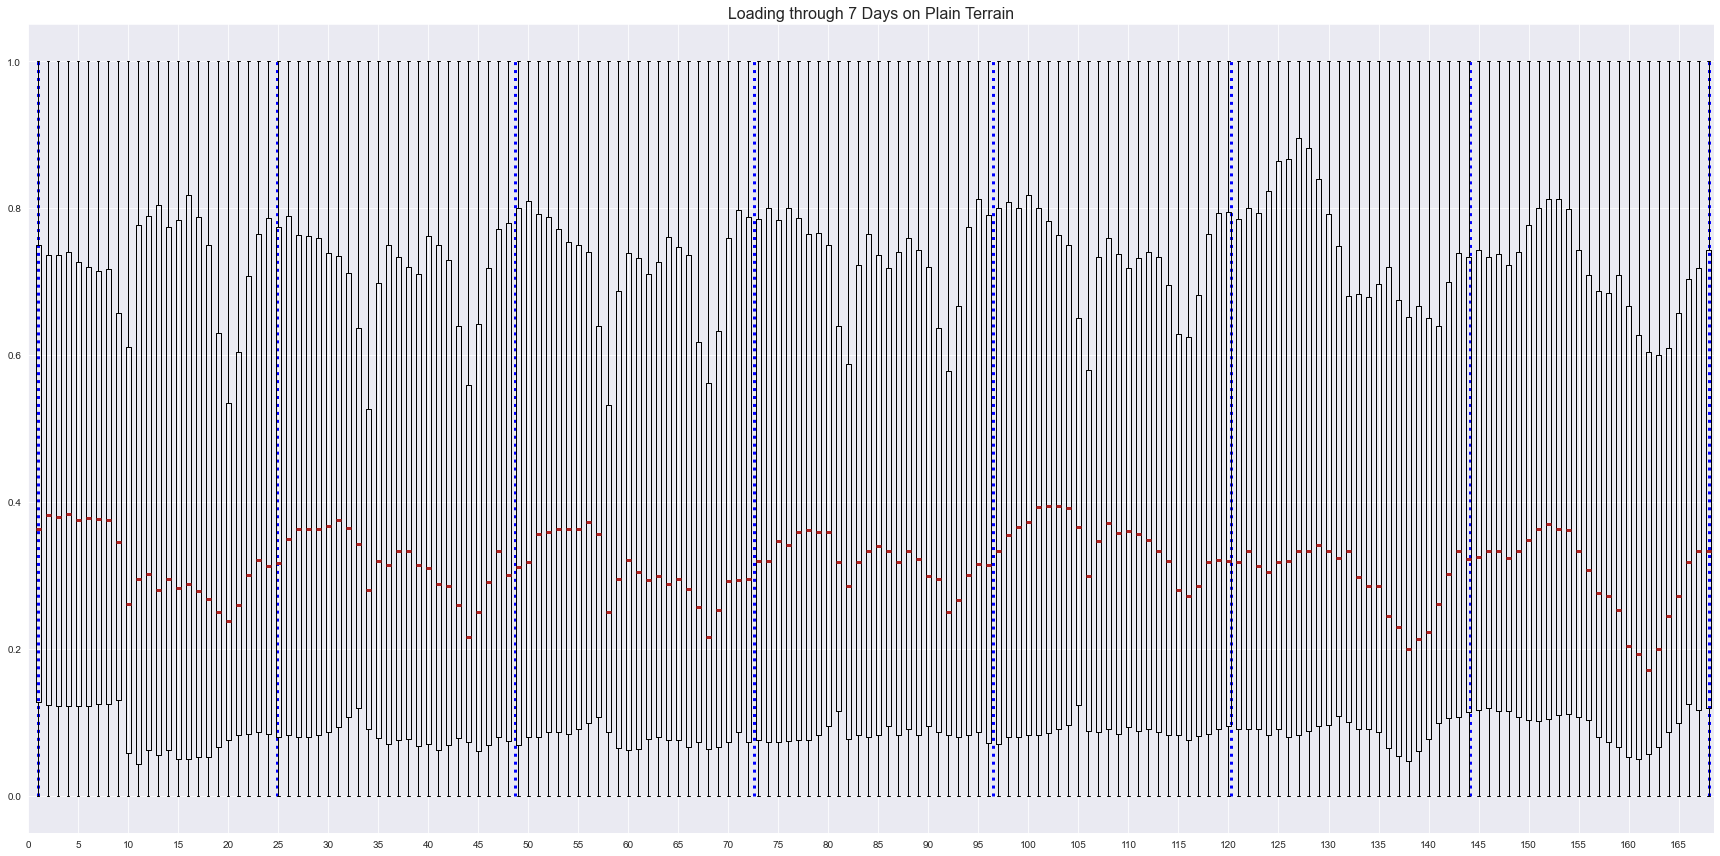

In [14]:
plot_boxplot(loading[~on_hill], medianprops,
             'Loading through 7 Days on Plain Terrain')
save_fig('boxplot_of_not_hill_stations')
plt.show()

## Principal Component Analysis

Given that we have many variables (168 variables), we make a Principal Component Analysis (PCA) to better understand the meaning of these variables. <br>
Data don't need to be scaled before performing PCA as they are between 0 and 1.

In [15]:
from sklearn.decomposition import PCA

n_components = 15
pca = PCA(n_components=n_components)
loading_pca = pca.fit_transform(loading)

We first plot the percentage of variance explained by the first 15 components.

Saving figure explained_var_ratio_and_cumulative


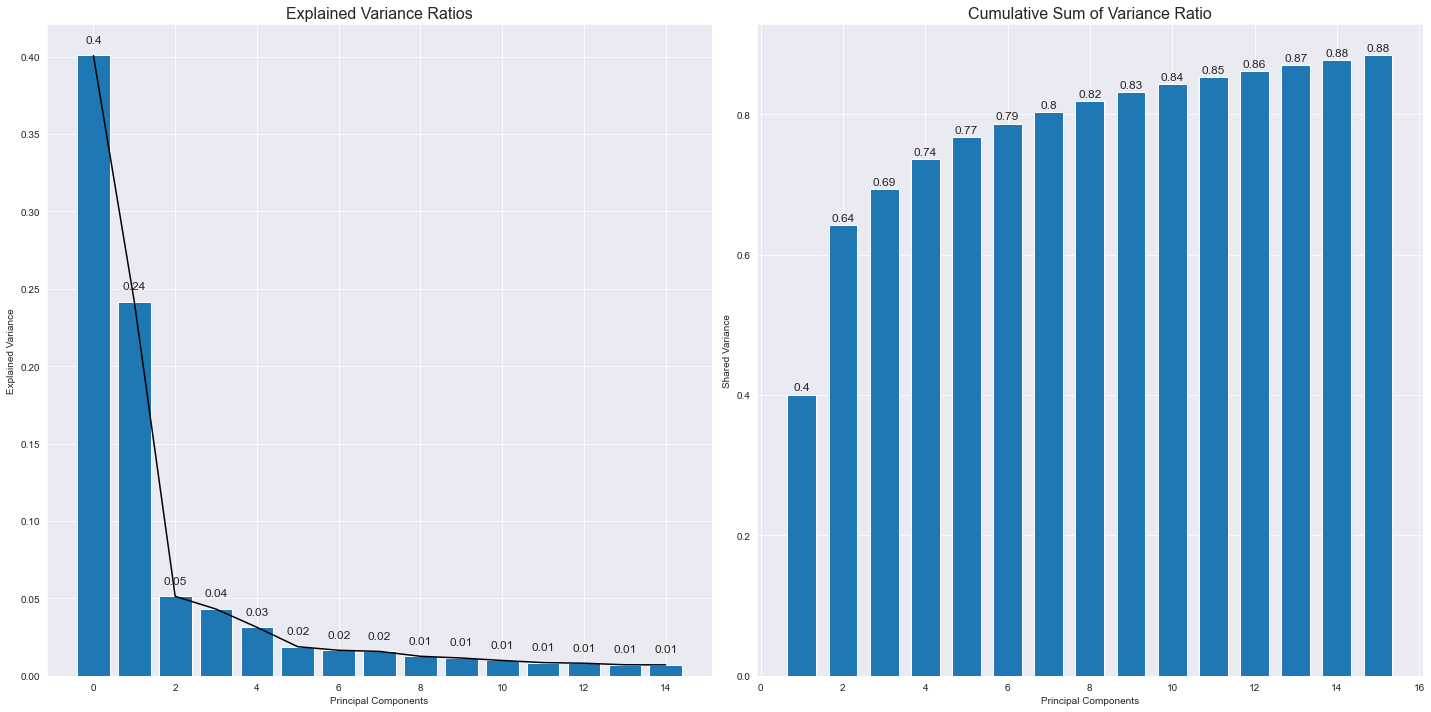

In [16]:
x = np.arange(pca.explained_variance_.size)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].bar(x, pca.explained_variance_ratio_)
ax[0].plot(pca.explained_variance_ratio_, color='black')
ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Explained Variance')
ax[0].set_title('Explained Variance Ratios')

for p in ax[0].patches:
    ax[0].annotate(text=np.round(p.get_height(), 2),
                   xy=(p.get_x()+p.get_width()/2., p.get_height()+0.01),
                   fontsize='large',
                   ha='center',
                   va='center')

ax[1].bar(x+1, np.cumsum(pca.explained_variance_ratio_), width=.7)
ax[1].set_ylabel('Shared Variance')
ax[1].set_xlabel('Principal Components')
ax[1].set_title('Cumulative Sum of Variance Ratio')

for p in ax[1].patches:
    ax[1].annotate(text=np.round(p.get_height(), 2),
                   xy=(p.get_x()+p.get_width()/2., p.get_height()+0.01),
                   fontsize='large',
                   ha='center',
                   va='center')

save_fig('explained_var_ratio_and_cumulative')
plt.show()

Most of the variance is contained in the first two components (around 60%), but there is still some important imformation in some of the following components. We explain 80% of the variance with the first seven components. <br>
On the graph 'Explained Variance Ratios', the curve of explained variance ratios is bent over the 6th principal component.<br>
We therefore choose to work with the first 6 components, given that after the sixth component, the cumulated sum of shared variance increases very slowly.

We also analyze the boxplot of the coordinates of the bike stations on the first fifteen principal axis.

Saving figure boxplot_of_pca


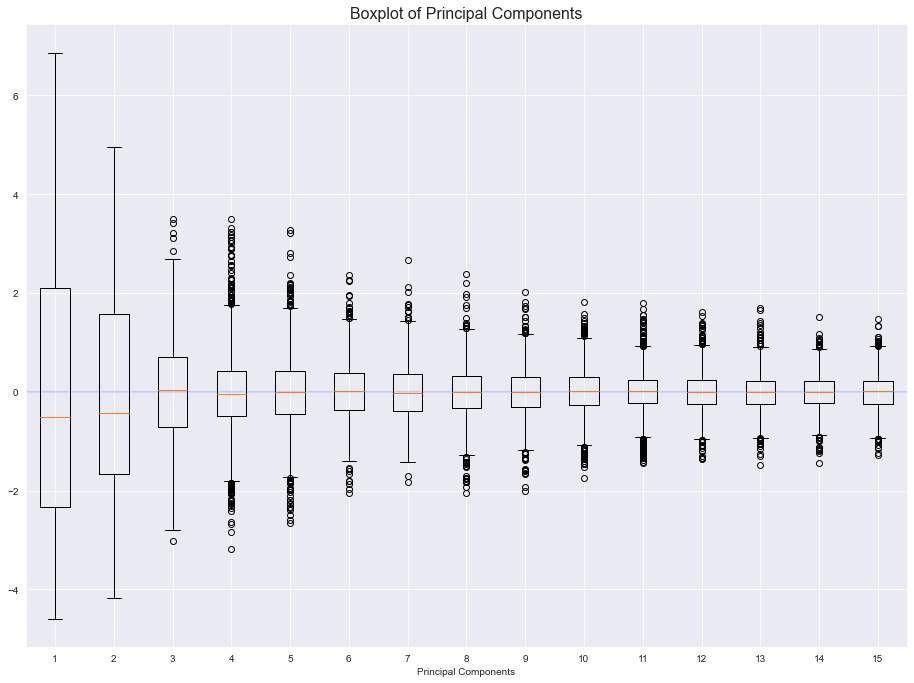

In [17]:
plt.boxplot(loading_pca)
plt.axhline(0, c='b', alpha=.2)
plt.xlabel('Principal Components')
plt.title('Boxplot of Principal Components')
save_fig('boxplot_of_pca')
plt.show()

These boxplots give us the same information as before. The first two components are the ones with the biggest variance, and after the sixth component, variance decreases very slowly. <br>
The medians are centered on 0 after the 3rd principal component and the extent of boxplots is constant after the 6th principal component.

The following figure shows the projection of all of the bike stations onto the plane formed by the first two principal axis.

Saving figure map_of_individuals


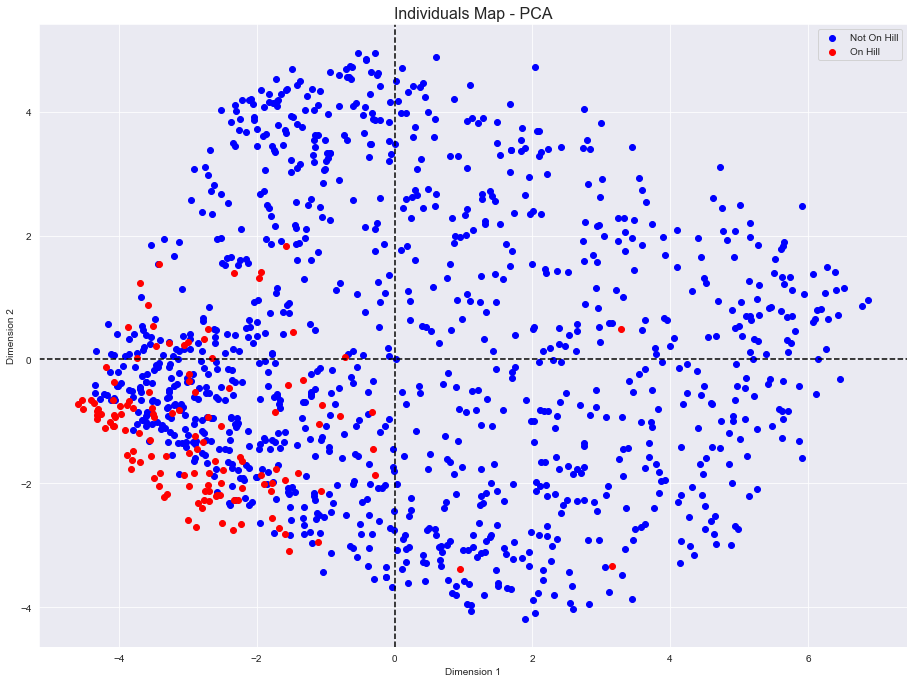

In [18]:
plt.scatter(loading_pca[:, 0][~on_hill], loading_pca[:, 1]
            [~on_hill], color='b', label='Not On Hill')
plt.scatter(loading_pca[:, 0][on_hill], loading_pca[:, 1]
            [on_hill], color='r', label='On Hill')
plt.legend()
plt.axhline(0, linestyle='--', color='black')
plt.axvline(0, linestyle='--', color='black')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Individuals Map - PCA')
plt.grid(True)
save_fig('map_of_individuals')
plt.show()

We observe that there might be a cluster near the bottom left corner, and amongst this cluster are most of the bike stations located on a hill.

We then plot the circle of correlation for the first two components, which we zoom in on to better appreciate.

Saving figure variables_correlation_1_2


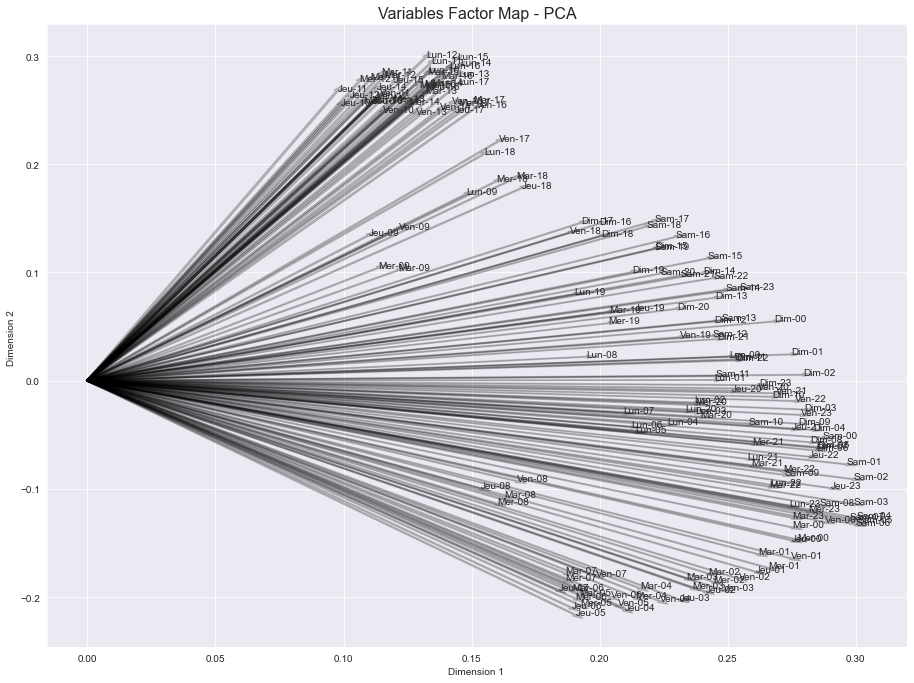

In [19]:
coord1 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord2 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

for i, j, nom in zip(coord1, coord2, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color='black', alpha=.2)

plt.title('Variables Factor Map - PCA')
plt.xlabel('Dimension 1 ')
plt.ylabel('Dimension 2 ')
plt.grid(True)
save_fig('variables_correlation_1_2')
plt.show()

We observe that all of the variables take positive values on the first principal axis. For the second axis, positive values tend to correspond to daytime hours (14 to 18), while negative values correspond to nighttime hours (23 to 05). However, all of the variables are very far away from the edge of the circle of radius 1. Therefore we can deduce that :

Principal Component 1: overall loading 

Principal Component 2: contrast between day and night

We also plot the circle of correlation for components 1 and 3.

Saving figure variables_correlation_1_3


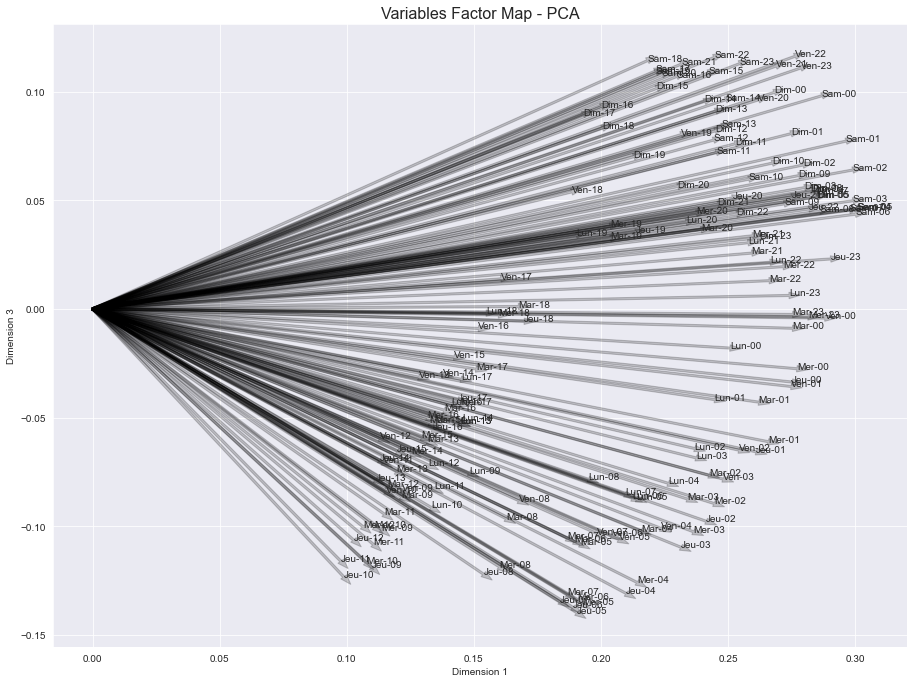

In [20]:
coord3 = pca.components_[2] * np.sqrt(pca.explained_variance_[2])

for i, j, nom in zip(coord1, coord3, loading.columns):
    plt.text(i, j, nom)
    plt.arrow(0, 0, i, j, color='black', alpha=.2)

plt.title('Variables Factor Map - PCA')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 3')
plt.grid(True)
save_fig('variables_correlation_1_3')
plt.show()

By observing the third principal component, we find that most of the variables with positive coordinates correspond to the days of the weekend, while most of the varibles with negative coordinates correspond to weekdays. We can conclude that:

Principal Component 3: contrast between weekdays and the weekend.

However, it is important to remember that this analysis is mostly inconclusive because the arrows are all very short in norms, which means that the correlation with either dimension is not very strong. 

Saving figure graphs


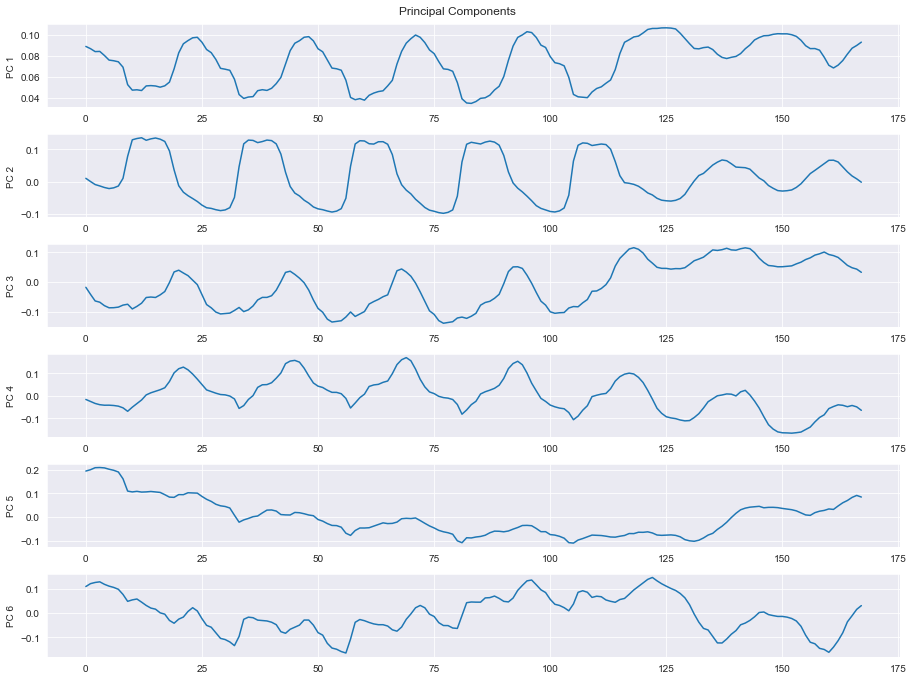

In [21]:
fig, axs = plt.subplots(6, 1)
for i in range(6):
    x = np.arange(len(pca.components_[1]))
    axs[i].plot(x, pca.components_[i])
    axs[i].set_ylabel("PC " + str(i+1))

fig.suptitle('Principal Components')
save_fig('graphs')
plt.show()

Saving figure dendrogram


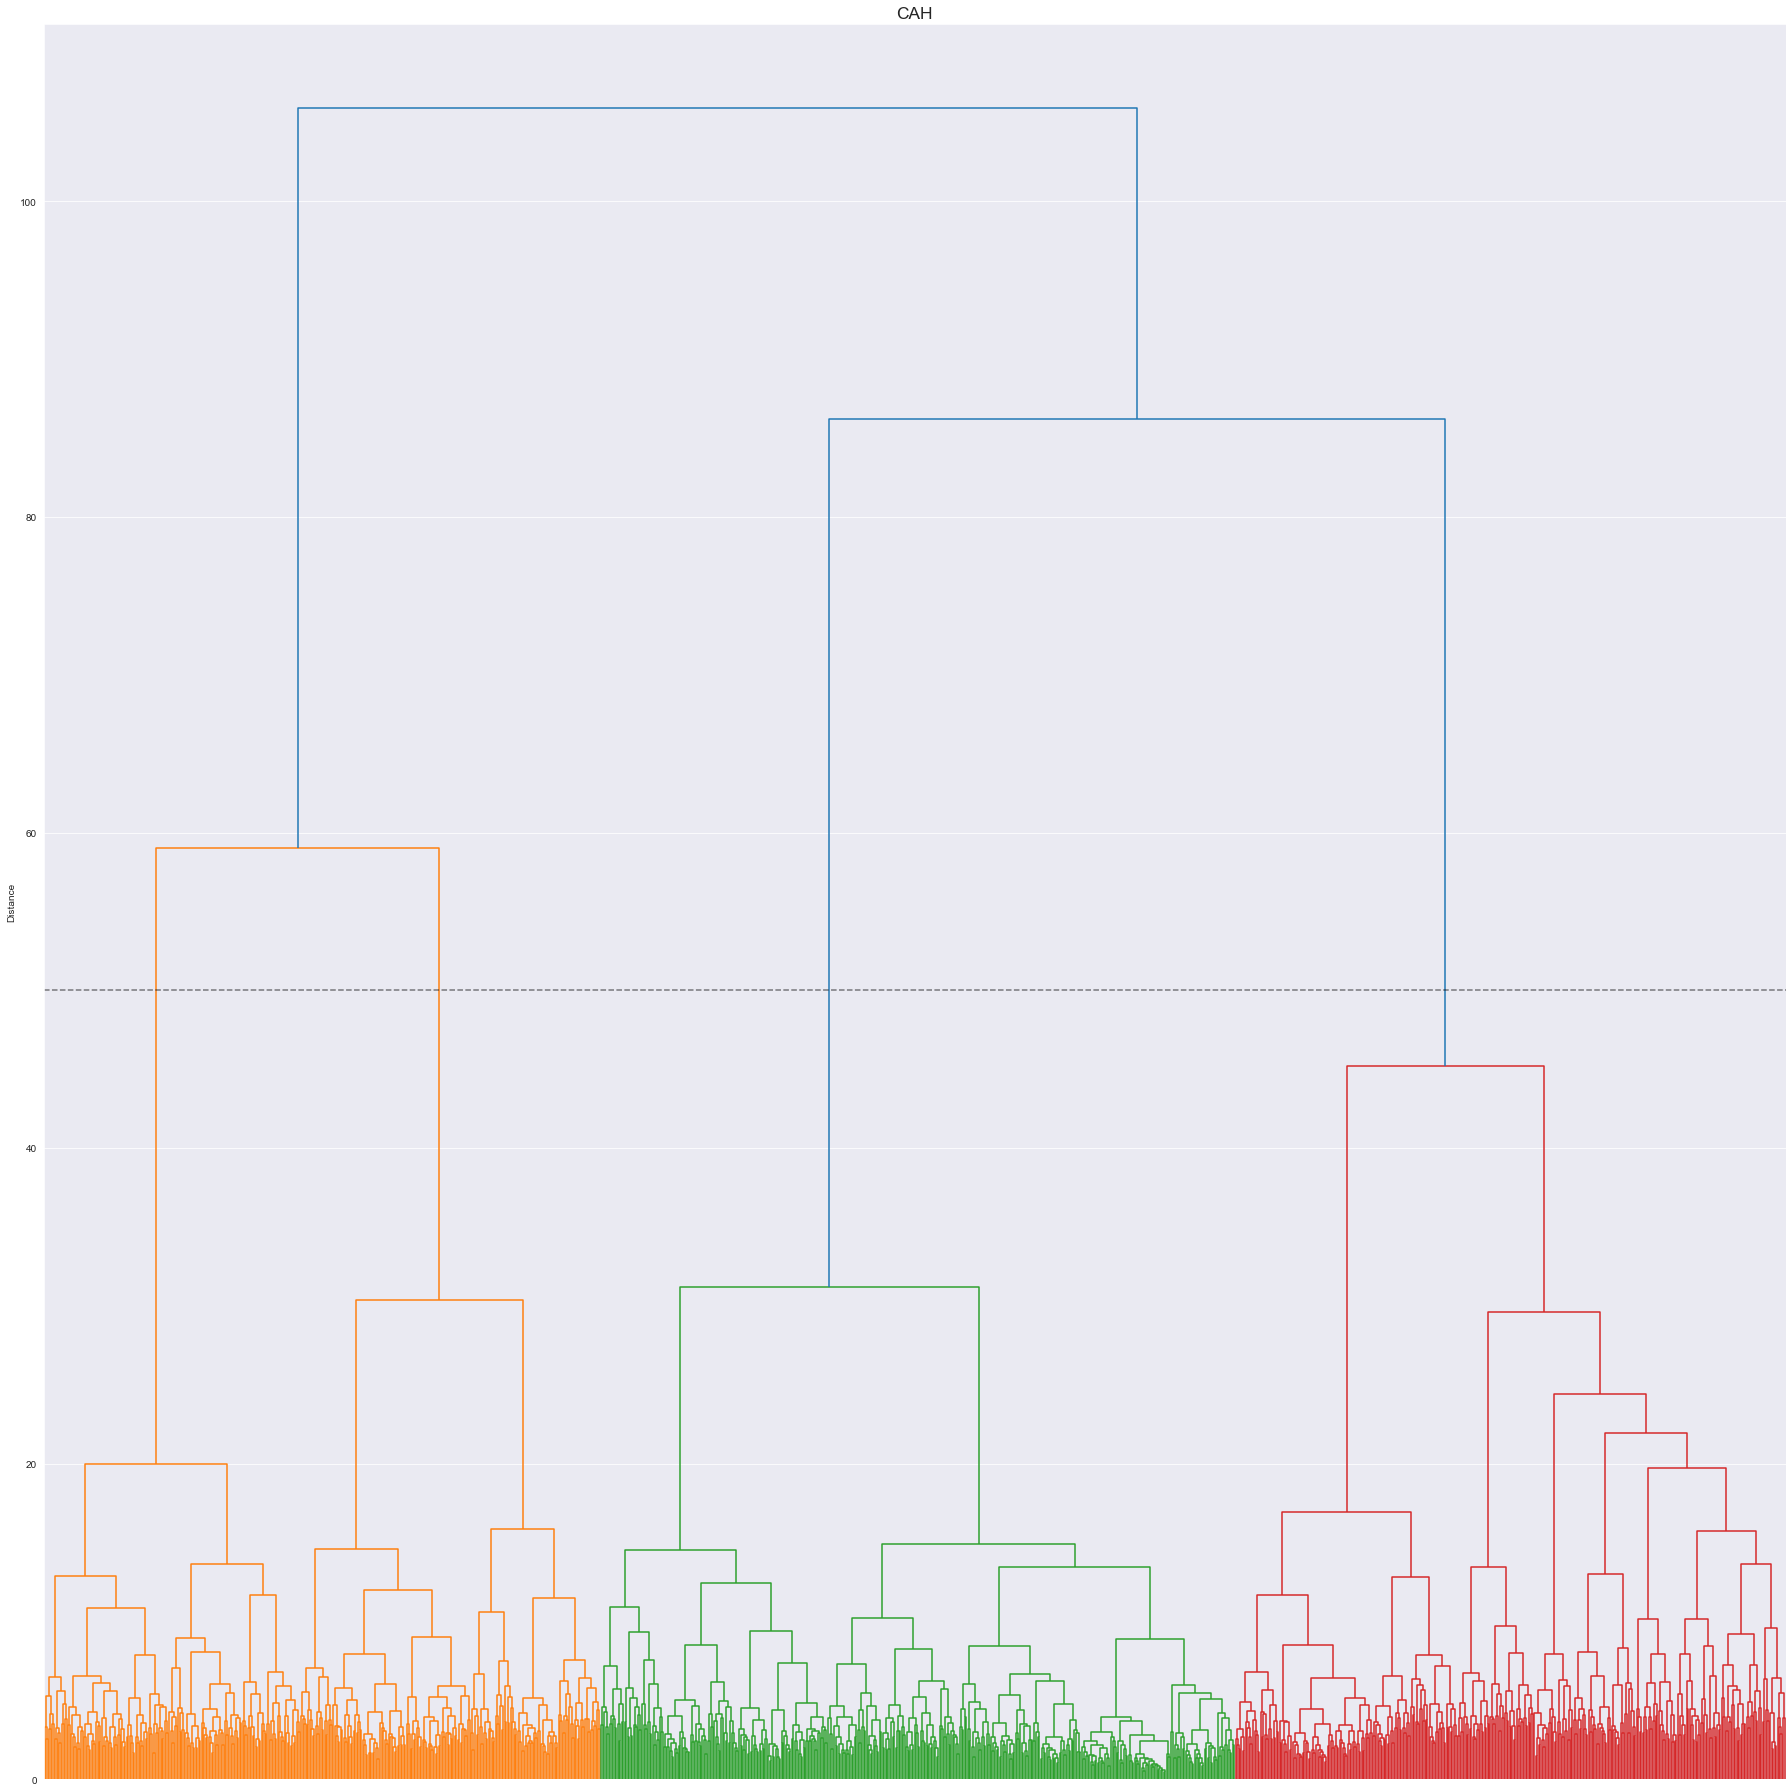

In [22]:
import scipy.cluster.hierarchy as sch

height = 50
Z = sch.linkage(loading, method="ward", metric="euclidean")
plt.figure(figsize=(25, 25))
sch.dendrogram(Z, no_labels=True)
plt.axhline(height, color='black', alpha=.5, linestyle='--')
plt.ylabel('Distance')
plt.title("CAH", fontsize='xx-large')
save_fig('dendrogram')
plt.show()

In [23]:
groups_cah = sch.fcluster(Z, t=height, criterion='distance')
newvelib = velibAdds.copy()
newvelib['group'] = groups_cah

In [24]:
n_clust = np.max(groups_cah)
print('Number of clusters:', n_clust)

Number of clusters: 4


In [25]:
import plotly.graph_objects as go
import plotly.offline as pof

colors = sns.color_palette("husl", n_clust).as_hex()
grouped = newvelib.groupby('group')
mapbox_access_token = "pk.eyJ1IjoibGFsb3VlYSIsImEiOiJja2tpaGdsbW0weWplMnZxdHl5cG1ncW8xIn0.NG1rULNFLX4zplmUV0WPoQ"

fig = go.Figure()
for i in range(n_clust):
    df_group = grouped.get_group(i+1)
    fig.add_trace(
        go.Scattermapbox(
            name='Cluster {}'.format(i+1),
            lon=df_group.longitude.values,
            lat=df_group.latitude.values,
            mode='markers',
            marker=dict(size=5, color=colors[i]),
            hovertemplate=df_group.names
        )
    )
fig.update_layout(
    title_text='CAH Clusters of Velib Stations',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        zoom=12,
        center={'lon': 2.3425123048878604, 'lat': 48.85920718597386}
    ),
    autosize=False,
    width=1500,
    height=850,
)
pof.iplot(fig)

Saving figure CAH_clusters


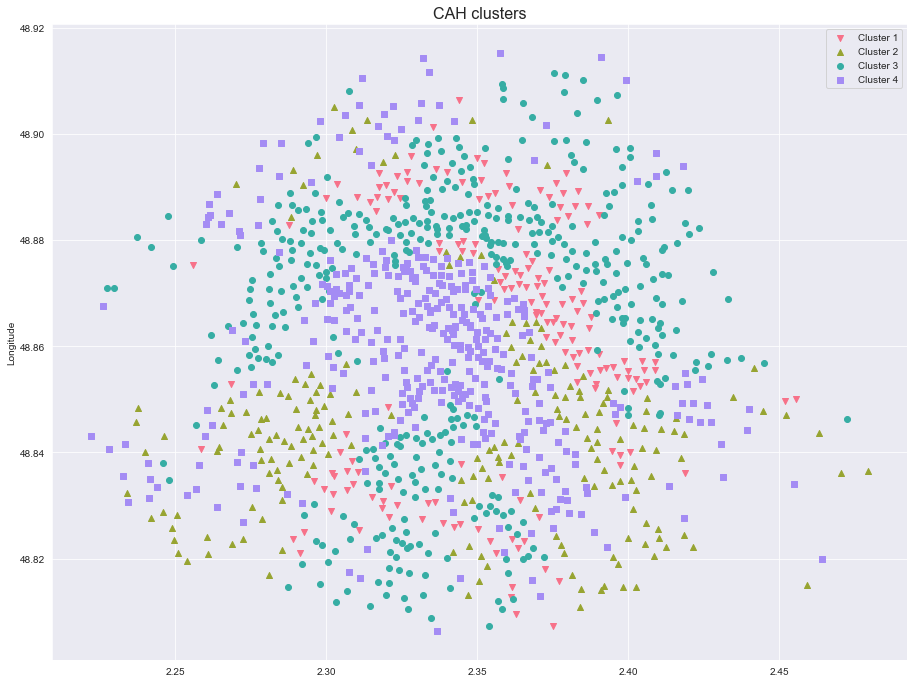

In [26]:
markers = ['v', '^', 'o', 's']

for i, marker in zip(np.arange(n_clust), markers):
    temp = grouped.get_group(i+1)
    plt.scatter(temp.longitude.values, temp.latitude.values,
                color=colors[i], label='Cluster {}'.format(i+1), marker=marker)

plt.ylabel('Latitude')
plt.ylabel('Longitude')
plt.title('CAH clusters')
plt.legend()
save_fig('CAH_clusters')
plt.show()

In [27]:
label_dic_hill = {1: 'Not On Hill', 2: 'On Hill'}


def plot_pca(l_pca, fig, ax, nbc, nbc2):
    for i in range(2):
        xs = l_pca[velibAdds.bonus == i, nbc - 1]
        ys = l_pca[velibAdds.bonus == i, nbc2 - 1]
        label = label_dic_hill[i + 1]
        color = cmaps(i)
        ax.scatter(xs, ys, color=color, alpha=.8, s=1, label=label)
        ax.set_xlabel("PC %d: %.2f%%" % (
            nbc, pca.explained_variance_ratio_[nbc - 1] * 100), fontsize=10)
        ax.set_ylabel("PC %d: %.2f%%" % (
            nbc2, pca.explained_variance_ratio_[nbc2 - 1] * 100), fontsize=10)

Saving figure scatter_of_1_4_pc


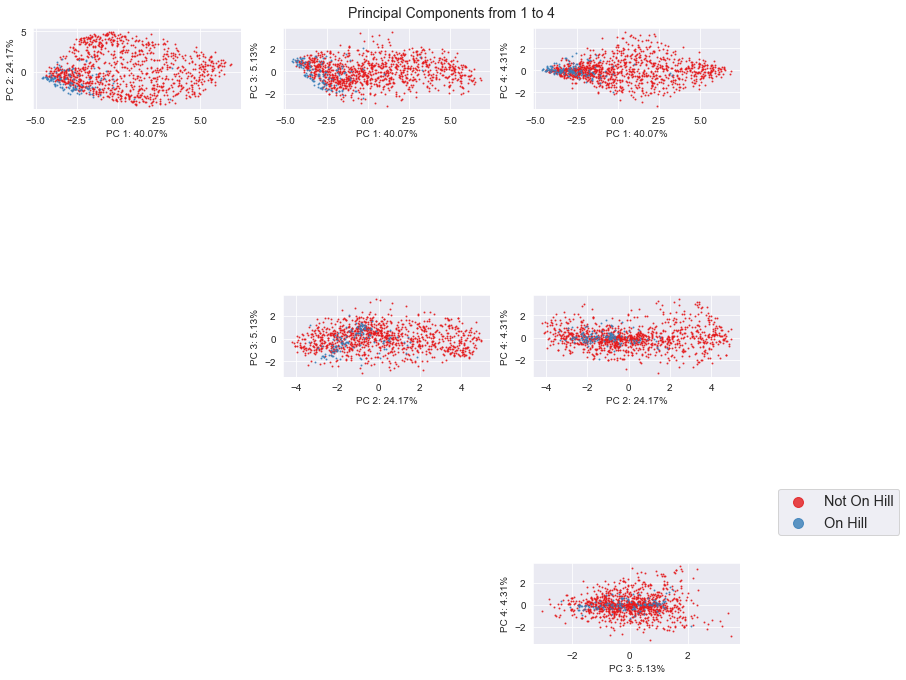

In [28]:
cmaps = plt.get_cmap("Set1")

fig = plt.figure()
for nbc, nbc2, count in [(1, 2, 1), (1, 3, 2), (1, 4, 3), (2, 3, 5), (2, 4, 6), (3, 4, 9)]:
    ax = fig.add_subplot(3, 3, count)
    plot_pca(loading_pca, fig, ax, nbc, nbc2)

plt.legend(loc='best', bbox_to_anchor=(1.8, 2),
           markerscale=10, fontsize='x-large')
plt.suptitle('Principal Components from 1 to 4', fontsize=14)
save_fig('scatter_of_1_4_pc')
plt.show()

## K-Means

We apply the $k$-means method to regroup the individuals projected into the space formed by the first three principal axis.

Saving figure classes_count_3_axis


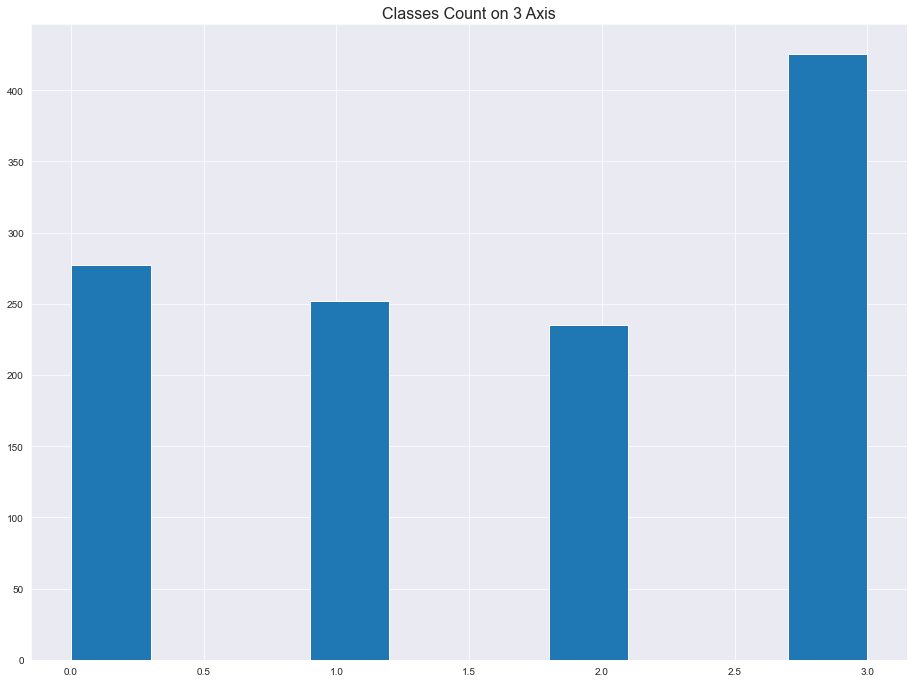

In [29]:
from sklearn.cluster import KMeans

loadingCP = loading_pca[:, 0:3]
kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(loadingCP)
kclassesACP = kmeans.labels_

pd.DataFrame(kclassesACP).hist()
plt.title('Classes Count on 3 Axis')
save_fig('classes_count_3_axis')
plt.show()

We do the same, but this time using the individuals in the full space $\mathbb{R}^{168}$.

Saving figure full_space


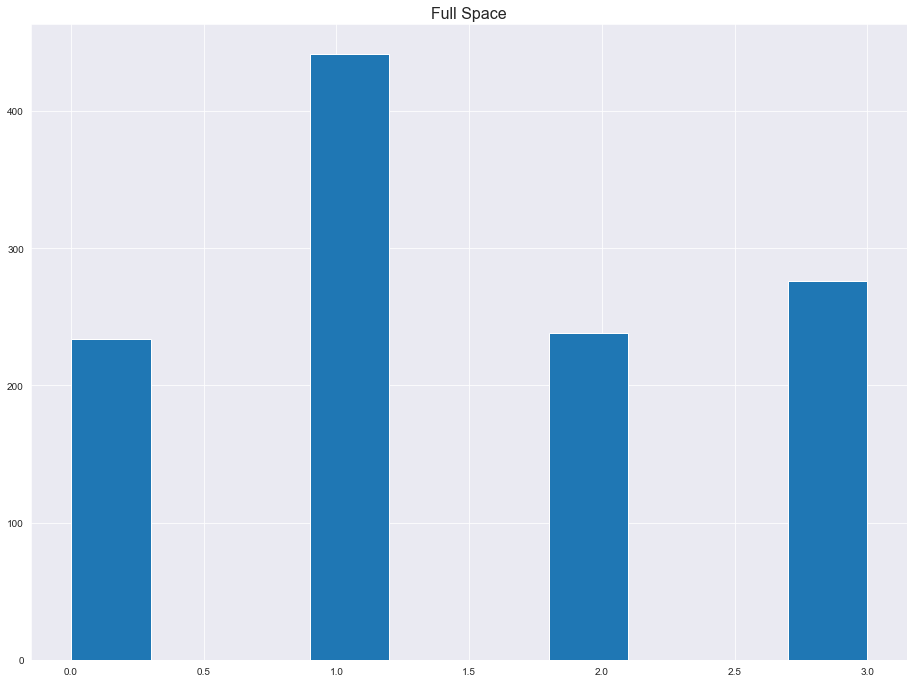

In [30]:
kmeans = KMeans(n_clusters=n_clust, random_state=0).fit(loading)
kclasses = kmeans.labels_
pd.DataFrame(kclasses).hist()
plt.title('Full Space')
save_fig('full_space')
plt.show()

In [31]:
def cross_table(classe1, classe2):
    table = pd.crosstab(classe1, classe2,
                        rownames=['classes ACP'], colnames=['classes données brutes'])
    a = np.zeros(np.shape(table)[0])
    b = np.zeros(np.shape(table)[0])
    for j in range(0, np.shape(table)[0]):
        for i in range(0, np.shape(table)[0]):
            if a[j] < table[i][j]:
                a[j] = table[i][j]
                b[j] = i

    print("")
    print("max colonne", a)
    print("j =", b)
    print("")
    tablebis = np.copy(table)
    for k in range(0, np.shape(table)[0]):
        tablebis[k][:] = table[b[k]][:]
    return tablebis

Using the function `cross_table` we compare these two groups of clusters.

In [32]:
cross_table(kclassesACP, kclasses)


max colonne [276. 236. 234. 425.]
j = [3. 2. 0. 1.]



array([[276,   0,   0,   0],
       [  1, 236,   1,   0],
       [  0,   0, 234,   0],
       [  0,  16,   0, 425]], dtype=int64)

The cross table shows that these two groups of clusters are practically the same. This can also be observed by comparing the two histograms.

We plot the indiviuals into the plane formed by the first two principal axis and we separate the previous clusters by color.

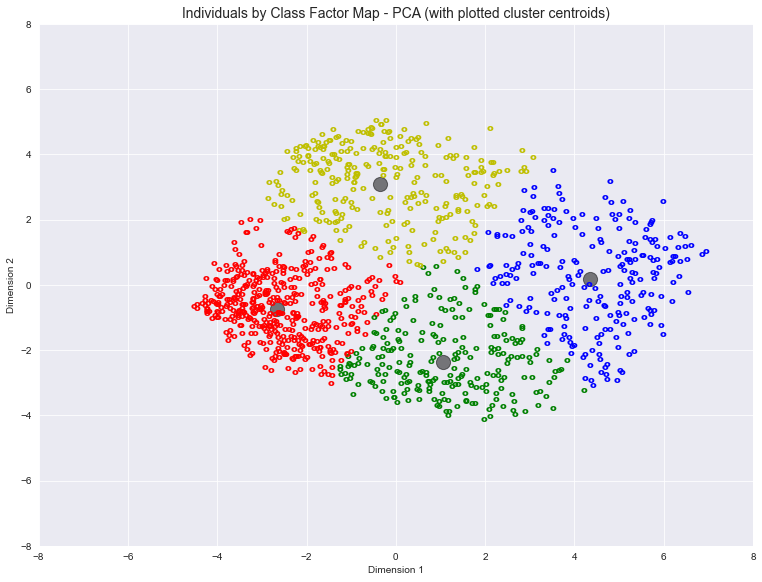

In [34]:
pc1 = loading_pca[:, 0]
pc2 = loading_pca[:, 1]
coul = ['b', 'r', 'g', 'y']
n_clusters = 4
# Choix des options
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# Exécution de l'algorithme
y_pred = kmeans.fit_predict(loading_pca)

centers = kmeans.cluster_centers_

for i, j, indcoul in zip(pc1, pc2, kclasses):
    plt.text(i, j, "o", color=coul[indcoul], fontweight='black')

plt.axis((-8, 8, -8, 8))
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Individuals by Class Factor Map - PCA (with plotted cluster centroids)', fontsize=14)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

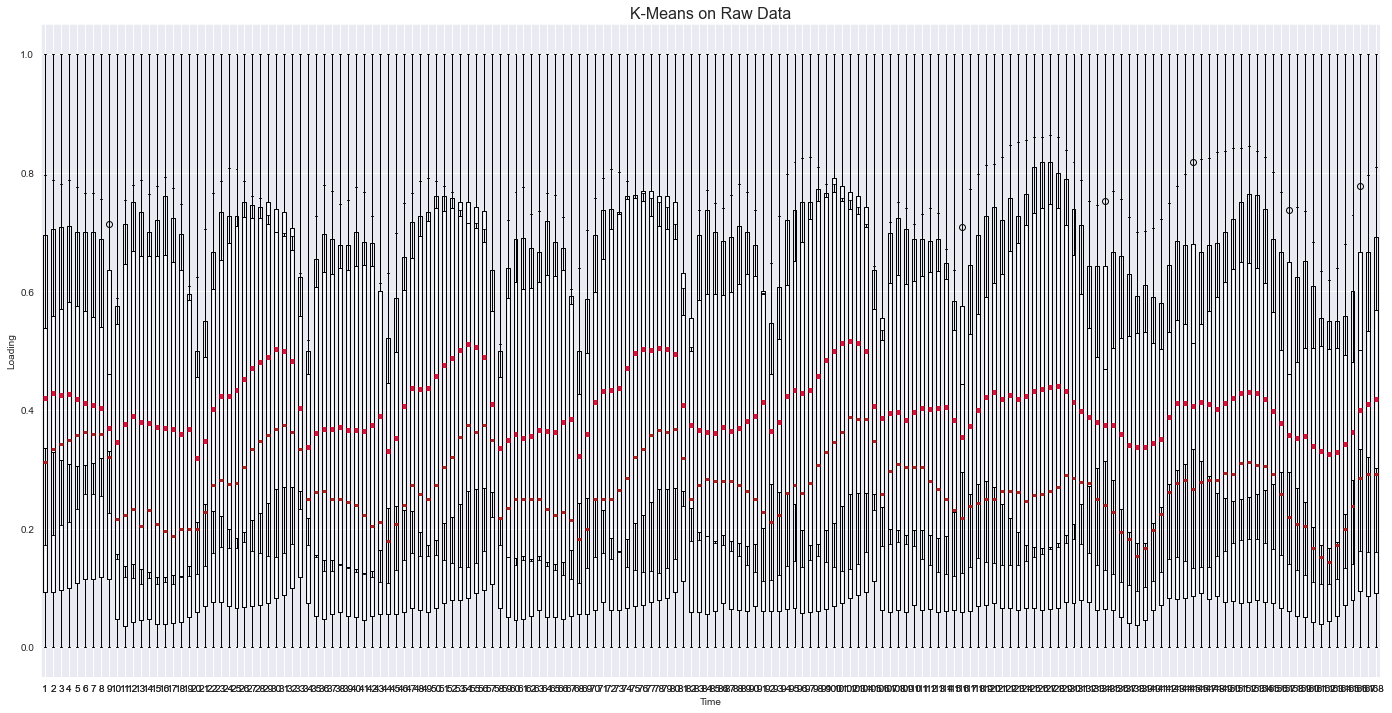

In [35]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
y_pred = kmeans.fit_predict(loading)
centers = kmeans.cluster_centers_

plt.figure(figsize=(24, 12))
plt.boxplot(loading, medianprops=medianprops)
plt.boxplot(centers, medianprops=dict(linestyle='dashed', linewidth=5, color='crimson'))
plt.xlabel('Time')
plt.ylabel('Loading')
plt.title('K-Means on Raw Data')
#save_fig('kmeans_raw')
plt.show()

C:\Users\Joan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.



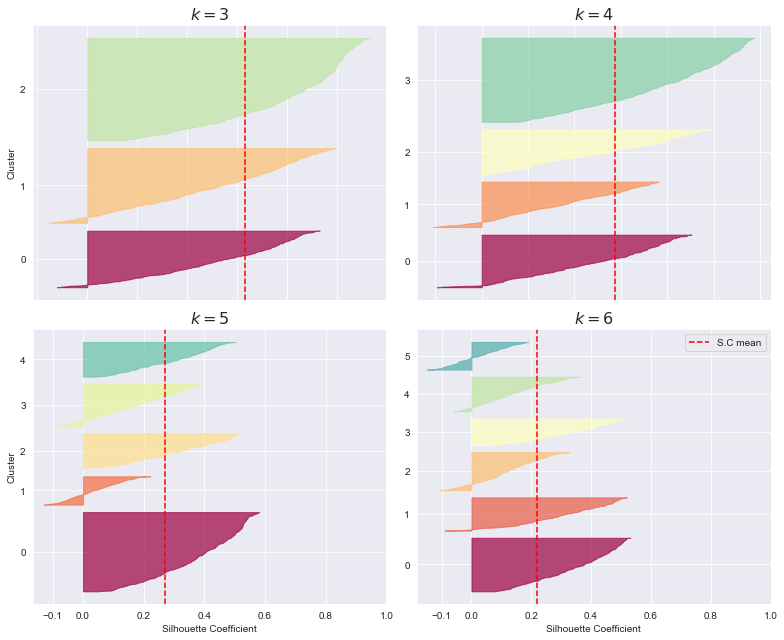

In [36]:
import matplotlib
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

X = loading_pca.copy()
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_score(X, kmeans.labels_)
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]


plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        cmap = matplotlib.cm.get_cmap("Spectral")
        color = cmap(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--", label='S.C mean')
    plt.title("$k={}$".format(k), fontsize=16)
#save_fig('silhouette_coefficient')
plt.tight_layout()
plt.legend()
plt.show()

We have plotted the silhouette coefficients according to the number of clusters. It is clear that using 5 or 6 clusters is a bad idea because some of the clusters have a lower than average silhouette coefficient. The answer is ambiguous, since the plots with 3 or 4 clusters reveal that both models are adequate. Both models do have misplaced samples and the 3 cluster model does have a cluster that contain a lot of samples. It also has a better average silhouette coefficient. The 4 clusters model does have more well distributed samples.

## Gaussian mixture model

In [37]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=n_clusters, n_init=10, random_state=42)
gm.fit(loading_pca[:,:2]) # est-on obligés de le faire en dim 2 ?
from matplotlib.colors import LogNorm


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

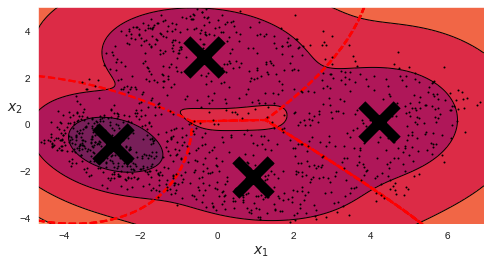

In [38]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, loading_pca[:,:2]) # est-on obligés de le faire en dim 2 ?
plt.show()

# Rq : Il faut plutôt ploter ces clusters comme on l'a fait avec les K-means